In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [7]:
test_type = 'opt'
thres = 54
base_path = f'[USER_PATH]\\ArtificialVision'
base_path = 'C:\\Users\\Na Min An\\Desktop\\Development\\ArtificialVision'

data_path = os.path.join(base_path, 'data')
opinion_df = pd.read_csv(os.path.join(data_path, 'OpinionsVer3.csv')).fillna(0)
if test_type == 'opt':
    opinion_df = pd.concat([opinion_df.iloc[:thres, :], opinion_df.iloc[-1, :].to_frame().transpose()], axis=0)
elif test_type == 'elec': 
    opinion_df = opinion_df.iloc[thres:-1, :]
opinion_df = opinion_df.reset_index()

opinion_df.tail()

,index,Human subject ID,Subjective opinion (Korean),Subjective opinion (English – DeepL translation),Level of Difficulty,Focused Facial Features
50,50,0.0,2. 대부분 얼굴형이나 머리모양에 주목을 하게 되는 것 같습니다. 혹은 콘트라스트가...,2. Most of the time I seem to focus on the fac...,0,0
51,51,499.0,-,-,-,-
52,52,500.0,"전반적으로 너무 어렵다. 옆모습 보고 앞모슾 맞추는게 어렵고, 몇가지는 거의 얼굴 ...","Overall, it's very difficult to match the side...","Overall, it's very difficult to match the side...",tried to make it gender-specific and focused o...
53,53,502.0,- 문제가 어려웠어요.,- The problem was difficult.,- The problem was difficult.,0
54,76,611.0,명암이 2단계일 때는 아무리 해상도가 좋아도 분간이 안 될 것 같아 보임. 적어도 ...,"At 2 levels of contrast, I don't think you can...","At 2 levels of contrast, I don't think you can...",Seemed to see a lot of hairstyles. Especially ...


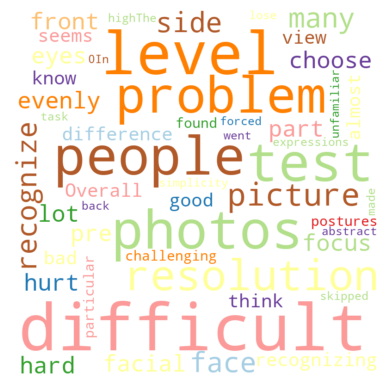

In [8]:
sel_col = 'Level of Difficulty'

text = ''
for i in range(opinion_df.shape[0]):
    text += opinion_df[sel_col].astype(str)[i]

wordcloud = WordCloud(width=800,
                      height=800,
                      max_words=50,
                      stopwords=list(STOPWORDS) + ['difficulty', '0The', '000Very', '0000Quite', '00The', '00It', 'even', 'etc', 'take', 'case', 't', 'm', 'will', 'given', 'whenever'],
                      background_color='white',
                      colormap='Paired').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

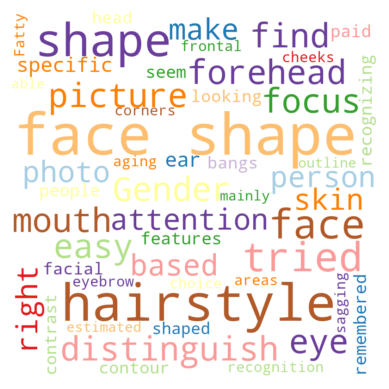

In [9]:
sel_col = 'Focused Facial Features'

text = ''
for i in range(opinion_df.shape[0]):
    text += opinion_df[sel_col].astype(str)[i]

wordcloud = WordCloud(width=800,
                      height=800,
                      max_words=50,
                      stopwords=list(STOPWORDS) + ['vs', '000000I', '000Very', '0000Quite', '00The', '00It', 'see', 'even', 'etc', 'take', 'case', 't', 'm', 'will', 'given', 'whenever', 'overall', 'quite', 'much', 'sure', 'several'],
                      background_color='white',
                      colormap='Paired').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()